## HW05 – Encoding Qualitative Variables and Interaction

### By Donovan Manogue

## Import Libaries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [5]:
# importing the appropriate libraries for this homework

## Import Data

In [7]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 5.csv')
df_realestate2= pd.read_csv('data/Real Estate Data - Week 5.csv')

In [8]:
# importing the proper data and putting it into a dataframe

## 5. Create the Initial Model with Quantitative Features only

### Section 5a: Create X and y

In [11]:
df_realestate.columns

Index(['Id', 'Dwelling Type', 'Lot Frontage', 'Lot Area', 'Land Contour',
       'Neighborhood', 'Location Condition', 'Overall Quality', 'Overall Cond',
       'Year Built', 'Masonry/Veneer Area', 'Basement Finished Area',
       'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
       'Bedrooms Above Grade', 'Kitchen Qual', 'Total Rooms Above Grade',
       'Fireplaces', 'Garage Finish', 'Garage Cars', 'Sale Condition',
       'Sale Price', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Pool',
       'Extra Kitchens', 'Baths per Bedroom'],
      dtype='object')

In [12]:
X = df_realestate[['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom']]
y = df_realestate ['Sale Price']

In [13]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     455.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:48:00   Log-Likelihood:                -16115.
No. Observations:                1387   AIC:                         3.227e+04
Df Residuals:                    1368   BIC:                         3.237e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.975e+04   7299.265    -13.666      0.000   -1.14e+05   -8.54e+04
Lot Frontage                85.6777     22.383      3.828      0.000      41.770     129.585
Lot Area                     0.5257      0.078      6.697      0.000       0.372       0.680
Overall Quality           1.856e+04    879.786     21.101      0.000    1.68e+04    2.03e+04
Overall Cond              3034.0501    702.252      4.320      0.000    1656.443    4411.657
Masonry/Veneer Area         22.7251      4.745      4.789      0.000      13.417      32.033
Basement Finished Area      34.1988      3.195     10.704      0.000      27.931      40.466
Basement Unfinished Area    18.0606      2.935      6.153      0.000      12.303      23.819
1st Floor Area              56.0644      4.263     13.150      0.000      47.701      64.428
2nd Floor Area              43.8518      3.649     12.019      0.000      36.694      51.009
Bedrooms Above Grade     -9601.9196   1762.110     -5.449      0.000   -1.31e+04   -6145.188
Total Rooms Above Grade   2800.2162    989.502      2.830      0.005     859.111    4741.321
Fireplaces                 615.9098   1374.671      0.448      0.654   -2080.783    3312.602
Garage Cars               1.187e+04   1384.520      8.576      0.000    9157.516    1.46e+04
Porch Area                  19.6883      5.198      3.787      0.000       9.491      29.886
Full Bathrooms            8211.0878   2084.296      3.940      0.000    4122.326    1.23e+04
Half Bathrooms            4233.6917   1686.593      2.510      0.012     925.104    7542.280
Extra Kitchens           -3.023e+04   3907.663     -7.737      0.000   -3.79e+04   -2.26e+04
Baths per Bedroom        -1416.6686   4099.113     -0.346      0.730   -9457.896    6624.559
==============================================================================
Omnibus:                      112.144   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.851
Skew:                           0.331   Prob(JB):                     3.33e-88
Kurtosis:                       5.556   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Created an OLS Regression Model using features from the 

## 6. Encode Qualitative Variables using One-Hot and Label Encoder

### Section 6a: One-hot encoding Land Contour

In [17]:
df_realestate['Land Contour'].value_counts(ascending = False)

Land Contour
Level         1248
Banked          57
Hillside        48
Depression      34
Name: count, dtype: int64

In [18]:
dummies_Land_Contour= pd.get_dummies(df_realestate['Land Contour'],prefix='lc', drop_first = False, dtype='int')
dummies_Land_Contour.sample(15, random_state=42)

,lc_Banked,lc_Depression,lc_Hillside,lc_Level
649,0,0,0,1
208,0,0,0,1
947,0,0,0,1
678,0,0,0,1
803,0,0,0,1
239,0,0,0,1
864,0,1,0,0
527,0,0,0,1
721,0,0,0,1
764,0,0,0,1


In [19]:
dummies_Land_Contour=dummies_Land_Contour.drop(columns=['lc_Level'])

In [20]:
# Creating a One Hot encoding for Land Contour

### Section 6b: One-hot encoding Dwelling Type

In [22]:
df_realestate['Dwelling Type'].value_counts()

Dwelling Type
1-STORY 1946 & NEWER    527
2-STORY 1946 & NEWER    290
1-1/2 STORY ALL AGES    138
1-STORY PUD              87
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     58
SPLIT OR MULTI-LEVEL     57
DUPLEX                   44
2 FAMILY CONVERSION      27
SPLIT FOYER              20
2-1/2 STORY ALL AGES     14
Name: count, dtype: int64

In [23]:
dummies_Dwelling_Type=pd.get_dummies(df_realestate['Dwelling Type'], prefix='dt', drop_first=False, dtype='int')
dummies_Dwelling_Type.sample(15, random_state = 100)

,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY 1946 & NEWER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL
1201,0,0,1,0,0,0,0,0,0,0,0,0
845,0,0,1,0,0,0,0,0,0,0,0,0
1074,0,0,1,0,0,0,0,0,0,0,0,0
1283,0,0,0,0,0,0,0,1,0,0,0,0
764,0,0,1,0,0,0,0,0,0,0,0,0
962,1,0,0,0,0,0,0,0,0,0,0,0
1151,0,0,0,0,0,0,0,1,0,0,0,0
978,0,0,1,0,0,0,0,0,0,0,0,0
345,0,0,0,0,0,0,0,1,0,0,0,0
139,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
dummies_Dwelling_Type.value_counts()

dt_1-1/2 STORY ALL AGES  dt_1-STORY 1945 & OLDER  dt_1-STORY 1946 & NEWER  dt_1-STORY PUD  dt_2 FAMILY CONVERSION  dt_2-1/2 STORY ALL AGES  dt_2-STORY 1945 & OLDER  dt_2-STORY 1946 & NEWER  dt_2-STORY PUD  dt_DUPLEX  dt_SPLIT FOYER  dt_SPLIT OR MULTI-LEVEL
0                        0                        1                        0               0                       0                        0                        0                        0               0          0               0                          527
                                                  0                        0               0                       0                        0                        1                        0               0          0               0                          290
1                        0                        0                        0               0                       0                        0                        0                        0               0        

In [25]:
dummies_Dwelling_Type=dummies_Dwelling_Type.drop(columns='dt_1-STORY 1946 & NEWER')

In [26]:
dummies_Dwelling_Type.sample(15, random_state=30)

,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL
889,0,0,0,0,0,0,0,0,0,0,0
1215,0,0,0,0,0,0,1,0,0,0,0
1098,0,1,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,1,0,0,0,0
585,0,0,0,0,0,0,0,0,0,1,0
1286,0,0,0,0,0,0,1,0,0,0,0
902,0,0,0,0,0,0,1,0,0,0,0
590,0,0,0,0,0,0,1,0,0,0,0
1154,0,0,0,0,0,0,0,0,0,0,1
1150,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Creating a One Hot encoding for Land Contour

### Section 6c: One-hot encoding Neighborhood

In [29]:
df_realestate['Neighborhood'].value_counts()

Neighborhood
North Ames                    214
College Creek                 150
Old Town                      101
Edwards                        87
Somerset                       86
Gilbert                        79
Sawyer                         74
Northridge Heights             74
Northwest Ames                 73
Sawyer West                    58
Crawford                       50
Brookside                      49
Mitchell                       46
Northridge                     38
Timberland                     36
Iowa DOT and Rail Road         34
Clear Creek                    27
South & West of Iowa State     24
Stone Brook                    22
Bloomington Heights            17
Briardale                      16
Veenker                        11
Meadow Village                 10
Northpark Villa                 9
Bluestem                        2
Name: count, dtype: int64

In [30]:
dummies_Neighborhood=pd.get_dummies(df_realestate['Neighborhood'], prefix='nh', drop_first=False, dtype='int')
dummies_Neighborhood.sample(15, random_state = 100)

,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,...,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker
1201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
dummies_Neighborhood=dummies_Neighborhood.drop(columns=['nh_North Ames'])

In [32]:
# Creating a One Hot encoding for Neighborhood

### Section 6d: One-hot encoding Location Condition

In [34]:
df_realestate['Location Condition'].value_counts()
dummies_Location_Condition=pd.get_dummies(df_realestate['Location Condition'], prefix = 'locc' , drop_first= False, dtype='int')
dummies_Location_Condition.sample(15, random_state= 20)

,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,locc_Normal
226,0,0,0,0,0,0,1
318,0,0,0,0,0,0,1
1296,0,0,0,0,0,0,1
646,0,0,0,0,0,0,1
1122,0,0,0,0,0,0,1
870,0,0,0,0,0,0,1
1089,0,0,0,0,0,0,1
1369,0,0,0,0,0,0,1
954,0,0,0,1,0,0,0
128,0,0,0,0,0,0,1


In [35]:
dummies_Location_Condition=pd.get_dummies(df_realestate['Location Condition'], prefix = 'locc' , drop_first= False, dtype='int')

In [36]:
dummies_Location_Condition= dummies_Location_Condition.drop(columns=['locc_Normal'])

In [37]:
dummies_Location_Condition.value_counts()

locc_Adjacent Arterial St  locc_Adjacent Feeder St  locc_Adjacent Pos Feature  locc_Adjacent Railroad  locc_Near Pos Feature  locc_Near Railroad
0                          0                        0                          0                       0                      0                     1200
                           1                        0                          0                       0                      0                       72
1                          0                        0                          0                       0                      0                       43
0                          0                        0                          1                       0                      0                       37
                                                                               0                       1                      0                       18
                                                                                          

In [38]:
# Creating a One Hot encoding for Location Condition

### Section 6e: One-hot encoding Garage Finish

In [40]:
df_realestate['Garage Finish'].value_counts()

Garage Finish
Unfinished        570
Rough Finished    418
Finished          336
No Garage          63
Name: count, dtype: int64

In [41]:
dummies_gf=pd.get_dummies(df_realestate['Garage Finish'], prefix = 'gf' , drop_first= False, dtype='int')
dummies_gf.sample(15, random_state= 20)

,gf_Finished,gf_No Garage,gf_Rough Finished,gf_Unfinished
226,0,0,1,0
318,0,0,1,0
1296,0,0,1,0
646,0,0,0,1
1122,0,0,0,1
870,0,0,1,0
1089,0,1,0,0
1369,0,0,1,0
954,0,0,1,0
128,1,0,0,0


In [42]:
dummies_gf=dummies_gf.drop(columns=['gf_Unfinished'])

In [43]:
dummies_gf

,gf_Finished,gf_No Garage,gf_Rough Finished
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1
...,...,...,...
1382,0,0,1
1383,0,0,0
1384,0,0,1
1385,0,0,0


In [44]:
# Creating a One Hot encoding for Garage Finish

### Section 6f: One-hot encoding Sale Condition

In [46]:
df_realestate['Sale Condition'].value_counts()


Sale Condition
Normal Sale                                                                                   1146
Home was not completed when last assessed (associated with New Homes)                          118
Abnormal Sale -  trade, foreclosure, short sale                                                 92
Sale between family members                                                                     20
Allocation - two linked properties with separate deeds, typically condo with a garage unit      11
Name: count, dtype: int64

In [47]:
dummies_sc=pd.get_dummies(df_realestate['Sale Condition'], prefix = 'sc' , drop_first= False, dtype='int')
dummies_sc.sample(15, random_state= 20)

,"sc_Abnormal Sale - trade, foreclosure, short sale","sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit",sc_Home was not completed when last assessed (associated with New Homes),sc_Normal Sale,sc_Sale between family members
226,0,0,0,1,0
318,0,0,0,1,0
1296,1,0,0,0,0
646,1,0,0,0,0
1122,0,0,0,1,0
870,0,0,1,0,0
1089,0,0,0,1,0
1369,0,0,0,1,0
954,0,0,0,1,0
128,0,0,0,1,0


In [48]:
dummies_sc=dummies_sc.drop(columns=['sc_Normal Sale'])

In [49]:
dummies_sc = dummies_sc.rename(columns={
    'sc_Abnormal Sale - trade, foreclosure, short sale':'sc_Abnormal Sale', \
    'sc_Allocation - two linked properties with separatedeeds, typically condo with a garage unit':'sc_Allocation', \
    'sc_Home was not completed when last assessed(associated with New Homes)':'sc_Home not complete', \
    'sc_Sale be tween family members':'sc_Sale within Family'
})


In [50]:
# One hot coding sale condition and changing the names of the columnets

### Section 6g: Label encoding Pool

In [52]:
from sklearn.preprocessing import LabelEncoder 
lc=LabelEncoder()

In [53]:
df_realestate['Pool'].value_counts()

Pool
No     1382
Yes       5
Name: count, dtype: int64

In [54]:
df_realestate['pool_Num'] = lc.fit_transform(df_realestate['Pool'])
df_realestate[['Pool', 'pool_Num']].head() 

,Pool,pool_Num
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [55]:
# in this section I used Label encoding for the Pool Variable

## 7. Create new X dataset and Re-Run Multiple Regression

### Section 7a: Concatenate dummy variables to df_realestate

In [58]:
df_realestate1 = pd.concat([df_realestate,dummies_Dwelling_Type,dummies_gf,dummies_Land_Contour,dummies_Location_Condition,dummies_Neighborhood,dummies_sc], axis = 1)
df_realestate1.head()

,Id,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,...,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,"sc_Abnormal Sale - trade, foreclosure, short sale","sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit",sc_Home was not completed when last assessed (associated with New Homes),sc_Sale between family members
0,1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,2003,...,0,0,0,0,0,0,0,0,0,0
1,2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,1976,...,0,0,0,0,0,1,0,0,0,0
2,3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,2001,...,0,0,0,0,0,0,0,0,0,0
3,4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,1915,...,0,0,0,0,0,0,1,0,0,0
4,5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,2000,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Adding all the dummy variables to the dataframe

### Section 7b: Create new X and y datasets

In [61]:
dummies_Dwelling_Type.columns

Index(['dt_1-1/2 STORY ALL AGES', 'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD',
       'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES',
       'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD',
       'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL'],
      dtype='object')

In [62]:
dummies_gf.columns

Index(['gf_Finished', 'gf_No Garage', 'gf_Rough Finished'], dtype='object')

In [127]:
dummies_Land_Contour.columns

Index(['lc_Banked', 'lc_Depression', 'lc_Hillside'], dtype='object')

In [129]:
dummies_Location_Condition.columns

Index(['locc_Adjacent Arterial St', 'locc_Adjacent Feeder St',
       'locc_Adjacent Pos Feature', 'locc_Adjacent Railroad',
       'locc_Near Pos Feature', 'locc_Near Railroad'],
      dtype='object')

In [131]:
dummies_Neighborhood.columns

Index(['nh_Bloomington Heights', 'nh_Bluestem', 'nh_Briardale', 'nh_Brookside',
       'nh_Clear Creek', 'nh_College Creek', 'nh_Crawford', 'nh_Edwards',
       'nh_Gilbert', 'nh_Iowa DOT and Rail Road', 'nh_Meadow Village',
       'nh_Mitchell', 'nh_Northpark Villa', 'nh_Northridge',
       'nh_Northridge Heights', 'nh_Northwest Ames', 'nh_Old Town',
       'nh_Sawyer', 'nh_Sawyer West', 'nh_Somerset',
       'nh_South & West of Iowa State', 'nh_Stone Brook', 'nh_Timberland',
       'nh_Veenker'],
      dtype='object')

In [133]:
dummies_sc.columns

Index(['sc_Abnormal Sale -  trade, foreclosure, short sale',
       'sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit',
       'sc_Home was not completed when last assessed (associated with New Homes)',
       'sc_Sale between family members'],
      dtype='object')

In [136]:
X = df_realestate1[['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom','dt_1-1/2 STORY ALL AGES', 'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD',
       'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES',
       'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD',
       'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL','gf_Finished', 'gf_No Garage', 'gf_Rough Finished','locc_Adjacent Arterial St', 'locc_Adjacent Feeder St',
       'locc_Adjacent Pos Feature', 'locc_Adjacent Railroad',
       'locc_Near Pos Feature', 'locc_Near Railroad','nh_Bloomington Heights', 'nh_Bluestem', 'nh_Briardale', 'nh_Brookside',
       'nh_Clear Creek', 'nh_College Creek', 'nh_Crawford', 'nh_Edwards',
       'nh_Gilbert', 'nh_Iowa DOT and Rail Road', 'nh_Meadow Village',
       'nh_Mitchell', 'nh_Northpark Villa', 'nh_Northridge',
       'nh_Northridge Heights', 'nh_Northwest Ames', 'nh_Old Town',
       'nh_Sawyer', 'nh_Sawyer West', 'nh_Somerset',
       'nh_South & West of Iowa State', 'nh_Stone Brook', 'nh_Timberland','sc_Abnormal Sale -  trade, foreclosure, short sale',
       'sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit',
       'sc_Home was not completed when last assessed (associated with New Homes)',
       'sc_Sale between family members',
       'nh_Veenker']]
y =df_realestate['Sale Price']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 66 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Lot Frontage                                                                                   1387 non-null   float64
 1   Lot Area                                                                                       1387 non-null   int64  
 2   Overall Quality                                                                                1387 non-null   int64  
 3   Overall Cond                                                                                   1387 non-null   int64  
 4   Masonry/Veneer Area                                                                            1387 non-null   float64
 5   Basement Finished Ar

In [138]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -15818.
No. Observations:                1387   AIC:                         3.177e+04
Df Residuals:                    1320   BIC:                         3.212e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                         -6.399e+04   7040.494     -9.089      0.000   -7.78e+04   -5.02e+04
Lot Frontage                                                                                     17.9250     19.840      0.903      0.366     -20.996      56.846
Lot Area                                                                                          0.4527      0.071      6.394      0.000       0.314       0.592
Overall Quality                                                                                1.313e+04    841.872     15.593      0.000    1.15e+04    1.48e+04
Overall Cond                                                                                   4937.0921    638.571      7.731      0.000    3684.366    6189.818
Masonry/Veneer Area                                                                              13.1511      4.307      3.054      0.002       4.702      21.600
Basement Finished Area                                                                           27.7163      2.746     10.093      0.000      22.329      33.103
Basement Unfinished Area                                                                         10.0452      2.572      3.906      0.000       5.000      15.091
1st Floor Area                                                                                   58.2258      3.863     15.074      0.000      50.648      65.804
2nd Floor Area                                                                                   52.8631      4.276     12.362      0.000      44.474      61.252
Bedrooms Above Grade                                                                          -6709.3345   1542.979     -4.348      0.000   -9736.293   -3682.376
Total Rooms Above Grade                                                                        1157.0918    866.322      1.336      0.182    -542.427    2856.611
Fireplaces                                                                                     1613.2300   1216.967      1.326      0.185    -774.171    4000.631
Garage Cars                                                                                    1.048e+04   1475.840      7.100      0.000    7582.799    1.34e+04
Porch Area                                                                                       23.2168      4.464      5.201      0.000      14.460      31.973
Full Bathrooms                                                                                 4849.1516   1859.898      2.607      0.009    1200.472    8497.831
Half 

#### The results explain 90% of the varibales variation. Making this a better model than some we have seen before, but only based on the R squared value. There are a few coeffeicients that have a high P value and it looks like we should remove them since they aren't statistically significant.

In [141]:
# We used the features from above to explain the variation and ran a regression model

### Section 7c: Analyze and Visualize the Multiple Regression Results

In [144]:
df_realestate1= pd.concat([df_realestate1, pred, resid], axis=1)

ValueError: If using all scalar values, you must pass an index

<Figure size 2000x800 with 0 Axes>

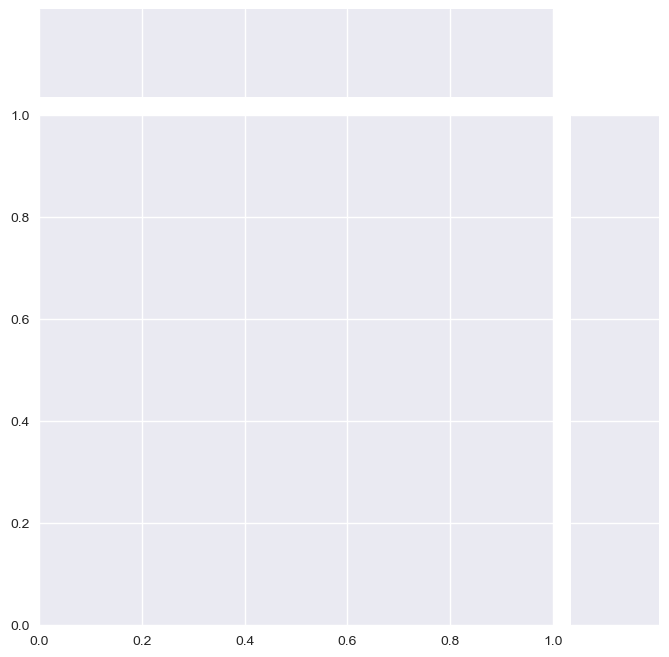

In [146]:
plt.figure(figsize=(20,8))
sns.jointplot(x=0, y=1 ,data=df_realestate1 ,kind = "reg", ratio=5, height = 8, 
              line_kws={'color': 'black'})
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residual')
#plt.subplot(122)
#sns.jointplot(x='Annual Income', y='Interest Rate', data = df_simplereg)

In [ ]:
Features=X
Features=Features.drop(columns=['const'])

In [ ]:
corrMatrix = Features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)


In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(200,200))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=X.drop(columns=['const'])

In [152]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,138.9,const
9,9.4,2nd Floor Area
25,7.3,dt_2-STORY 1946 & NEWER
8,5.6,1st Floor Area
18,5.3,Baths per Bedroom
...,...,...
34,1.1,locc_Adjacent Feeder St
62,1.1,"sc_Abnormal Sale - trade, foreclosure, short ..."
28,1.1,dt_SPLIT FOYER
65,1.1,sc_Sale between family members


#### After running the jointplot, VIF and heatmap, it gave us some indight on what to do next. We should eliminate a good portion of these vairbales since the VIF shows that there is a lot of mulitcollineartiy going on.
#### Extra Kitchens and duplex would have a relationship in the real world since a duplex would be a house split in half so if there was only one kitchen there would be a very big problem there if you were the tenant on the other half of the building.

In [154]:
# Analyzing and visualizing the regression reuslts 

### Section 7d: Re-run a Multiple Regression model after removing the highest VIF feature

In [156]:
dummies_gf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gf_Finished        1387 non-null   int64
 1   gf_No Garage       1387 non-null   int64
 2   gf_Rough Finished  1387 non-null   int64
dtypes: int64(3)
memory usage: 32.6 KB


In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 67 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   const                                                                                          1387 non-null   float64
 1   Lot Frontage                                                                                   1387 non-null   float64
 2   Lot Area                                                                                       1387 non-null   int64  
 3   Overall Quality                                                                                1387 non-null   int64  
 4   Overall Cond                                                                                   1387 non-null   int64  
 5   Masonry/Veneer Area 

In [158]:
X.drop(columns=['gf_Finished','gf_No Garage','gf_Rough Finished'])

,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,...,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,"sc_Abnormal Sale - trade, foreclosure, short sale","sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit",sc_Home was not completed when last assessed (associated with New Homes),sc_Sale between family members,nh_Veenker
0,1.0,65.0,8450,7,5,196.0,706,150,856,854,...,0,0,0,0,0,0,0,0,0,0
1,1.0,80.0,9600,6,8,0.0,978,284,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,68.0,11250,7,5,162.0,486,434,920,866,...,0,0,0,0,0,0,0,0,0,0
3,1.0,60.0,9550,7,5,0.0,216,540,961,756,...,0,0,0,0,0,1,0,0,0,0
4,1.0,84.0,14260,8,5,350.0,655,490,1145,1053,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1.0,62.0,7917,6,5,0.0,0,953,953,694,...,0,0,0,0,0,0,0,0,0,0
1383,1.0,85.0,13175,6,6,119.0,790,589,2073,0,...,0,0,0,0,0,0,0,0,0,0
1384,1.0,66.0,9042,7,9,0.0,275,877,1188,1152,...,0,0,0,0,0,0,0,0,0,0
1385,1.0,68.0,9717,5,6,0.0,49,0,1078,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:11:46   Log-Likelihood:                -15818.
No. Observations:                1387   AIC:                         3.177e+04
Df Residuals:                    1320   BIC:                         3.212e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                         -6.399e+04   7040.494     -9.089      0.000   -7.78e+04   -5.02e+04
Lot Frontage                                                                                     17.9250     19.840      0.903      0.366     -20.996      56.846
Lot Area                                                                                          0.4527      0.071      6.394      0.000       0.314       0.592
Overall Quality                                                                                1.313e+04    841.872     15.593      0.000    1.15e+04    1.48e+04
Overall Cond                                                                                   4937.0921    638.571      7.731      0.000    3684.366    6189.818
Masonry/Veneer Area                                                                              13.1511      4.307      3.054      0.002       4.702      21.600
Basement Finished Area                                                                           27.7163      2.746     10.093      0.000      22.329      33.103
Basement Unfinished Area                                                                         10.0452      2.572      3.906      0.000       5.000      15.091
1st Floor Area                                                                                   58.2258      3.863     15.074      0.000      50.648      65.804
2nd Floor Area                                                                                   52.8631      4.276     12.362      0.000      44.474      61.252
Bedrooms Above Grade                                                                          -6709.3345   1542.979     -4.348      0.000   -9736.293   -3682.376
Total Rooms Above Grade                                                                        1157.0918    866.322      1.336      0.182    -542.427    2856.611
Fireplaces                                                                                     1613.2300   1216.967      1.326      0.185    -774.171    4000.631
Garage Cars                                                                                    1.048e+04   1475.840      7.100      0.000    7582.799    1.34e+04
Porch Area                                                                                       23.2168      4.464      5.201      0.000      14.460      31.973
Full Bathrooms                                                                                 4849.1516   1859.898      2.607      0.009    1200.472    8497.831
Half 

In [160]:
X=X.drop(columns=['const'])

In [161]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
10,92.0,Total Rooms Above Grade
2,69.5,Overall Quality
7,62.0,1st Floor Area
9,49.1,Bedrooms Above Grade
14,41.3,Full Bathrooms
...,...,...
34,1.1,locc_Adjacent Pos Feature
61,1.1,"sc_Abnormal Sale - trade, foreclosure, short ..."
27,1.1,dt_SPLIT FOYER
64,1.1,sc_Sale between family members


#### When looking at the results the R squared is still the same value, we do have less variables so not much changing is good, meaning those weren't adding any value based on the data we have now. I think this model is stronger since it has less features contributing to the model. There is more multi-collinearity, I think this model could be better if we continues to get rid of these high VIF factors.

In [163]:
# Rerunning th regression after getting rid of some features

## 8. Summary and Explanation of All Steps

#### The rational behind encoding features is so that we can give a value to features based off their base feature.
#### In the original model the relationship was 85% explanantion of the variation slightly less  to the newer model 90%. With there being more features in the newer model towards the end.
#### The Plots and the VIF help asses Multi-Collinearity.
#### The relationship in the new model explains 90% of the variaiton within the dataset, but still has mulit-collinearity and more variables.
#### The first model showed more strenght due to there being less features within the model and more features that added to the model with less multi-collinearity.
#### In real terms these features add value to the Sales Price of these homes, and we can get a better prediciton of the cost of a home based on the 90% explaination of the data variation